<a href="https://colab.research.google.com/github/linusl7/Seminar/blob/master/colab_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

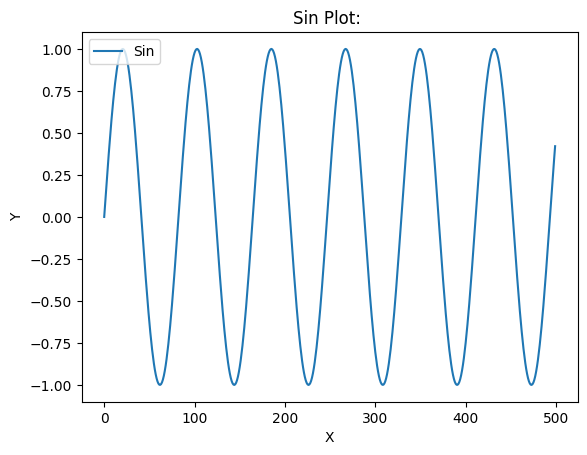

In [ ]:
import os
import random
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib

NUM_DATAPOINTS = 300
NUM_SAMPLES_PER_DP = 500
TIME_STEP = 0.1

def run():
	count = 0

	for k in range(NUM_DATAPOINTS):

		x_samples = []
		y_samples = []

		split_str = 'train'
		if random.random() > 0.8:
			split_str = 'val'

		mu = 1.0
		sigma = 0.3
		frequency = np.random.normal(mu, sigma)

		for i in range(NUM_SAMPLES_PER_DP):
			x = i * TIME_STEP * frequency
			y = math.sin(x)

			x_samples.append(x)
			y_samples.append(y)

		x_samples = np.asarray(x_samples)
		y_samples = np.asarray(y_samples)

		out_path = 'datasets/sin_data/' + split_str + '/'

		if not os.path.exists(out_path):
			os.makedirs(out_path)

		#Write data file
		file_name = out_path + str(count).zfill(4) + '.txt'
		file = open(file_name, "a")
		for i in range(len(x_samples)):
			s = str(x_samples[i]) + ' ' + str(y_samples[i]) + '\n'
			file.write(s)
		file.close()

		#Plot data
		plt.clf()
		plt.plot(y_samples)
		plt.title('Sin Plot: ')
		plt.ylabel('Y')
		plt.xlabel('X')
		plt.legend(['Sin'], loc='upper left')
		plt.savefig(out_path + str(count).zfill(4) + '.png')

		count += 1

if __name__== "__main__":
  run()



GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 30, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 1, 1)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,409 (130.50 KB)

 Trainable params: 33,409 (130.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


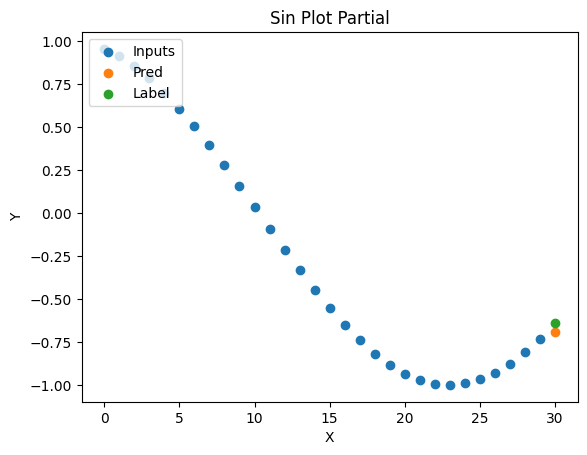

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 667s 66ms/step - loss: 0.0315 - mae: 0.1128 - mse: 0.0315 - val_loss: 0.0032 - val_mae: 0.0425 - val_mse: 0.0032
Epoch 2/1000
 1955/10000 ━━━━━━━━━━━━━━━━━━━━ 8:45 65ms/step - loss: 0.0053 - mae: 0.0553 - mse: 0.0053

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf
import glob
from matplotlib import pyplot as plt
import matplotlib

GPU_STRING = '/gpu:0'
BATCH_SIZE = 128
MODEL_NAME = "experiment1"
EPOCHS = 100
STEPS_PER_EPOCH = 10000
VALIDATION_STEPS = 32
SEQ_LEN_PAST = 30
SEQ_LEN_FUTURE = 1
NUM_INPUT_PARAMETERS = 1
NUM_OUTPUT_PARAMETERS = 1

class ModelHistory(tf.keras.callbacks.Callback):
  def __init__(self, model_path):
    self.model_path = model_path
    self.loss = []
    self.loss_val = []
    self.mae = []
    self.mae_val = []
    self.mse = []
    self.mse_val = []

  def on_epoch_end(self, batch, logs):
    self.loss.append(logs.get('loss'))
    self.loss_val.append(logs.get('val_loss'))
    self.mae.append(logs.get('mean_absolute_error'))
    self.mse.append(logs.get('mean_squared_error'))
    self.mae_val.append(logs.get('val_mean_absolute_error'))
    self.mse_val.append(logs.get('val_mean_squared_error'))
    self.plot_data()

  def plot_data(self):
    vis_path = os.path.join(self.model_path, 'vis')

    if not os.path.exists(vis_path):
      os.makedirs(vis_path)

    model_name = self.model_path.split('/')[-1]

    plt.clf()
    plt.plot(self.loss)
    plt.plot(self.loss_val)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    metadata = 'Model: ' + mname + '\n' + 'Stepsize: ' + str(STEPS_PER_EPOCH) + '\n' + 'Batchsize: ' + str(BATCH_SIZE) + '\n' + 'Learning Rate: ' + str(LEARNING_RATE) + '\n'
    plt.figtext(0.5, -0.1, metadata, wrap=True, horizontalalignment='center', fontsize=8)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(os.path.join(vis_path, 'loss.png'))


def setup_model_mlp():
  input = tf.keras.layers.Input(shape=(SEQ_LEN_PAST, NUM_INPUT_PARAMETERS), name='input')

  dp = 0.4
  x = tf.keras.layers.Flatten()(input)
  x = tf.keras.layers.Dense(1024, activation='relu')(x)
  x = tf.keras.layers.Dropout(dp)(x)
  x = tf.keras.layers.Dense(1024, activation='relu')(x)
  x = tf.keras.layers.Dropout(dp)(x)
  x = tf.keras.layers.Dense(1024, activation='relu')(x)
  x = tf.keras.layers.Dropout(dp)(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(dp)(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(dp)(x)
  x = tf.keras.layers.Dense(SEQ_LEN_FUTURE * NUM_OUTPUT_PARAMETERS, activation='linear')(x)
  x = tf.keras.layers.Reshape((SEQ_LEN_FUTURE, NUM_OUTPUT_PARAMETERS))(x)

  model = tf.keras.models.Model(input, x)
  return model


def setup_model_conv_1d():
  input = tf.keras.layers.Input(shape=(SEQ_LEN_PAST, NUM_INPUT_PARAMETERS), name='input')

  dp = 0.4
  x = tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(input)
  x = tf.keras.layers.Dropout(dp)(x)
  x = tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
  x = tf.keras.layers.Dropout(dp)(x)
  x = tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
  x = tf.keras.layers.Dropout(dp)(x)
  x = tf.keras.layers.GlobalAveragePooling1D()(x)

  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dense(SEQ_LEN_FUTURE * NUM_OUTPUT_PARAMETERS, activation='linear')(x)
  x = tf.keras.layers.Reshape((SEQ_LEN_FUTURE, NUM_OUTPUT_PARAMETERS))(x)

  model = tf.keras.models.Model(input, x)
  return model


def setup_model_lstm():
  input = tf.keras.layers.Input(shape=(SEQ_LEN_PAST, NUM_INPUT_PARAMETERS), name='input')

  x = tf.keras.layers.LSTM(256, return_sequences=True)(input)
  x = tf.keras.layers.LSTM(512)(input)
  x = tf.keras.layers.Dense(SEQ_LEN_FUTURE * NUM_OUTPUT_PARAMETERS, activation='linear')(x)
  x = tf.keras.layers.Reshape((SEQ_LEN_FUTURE, NUM_OUTPUT_PARAMETERS))(x)

  model = tf.keras.models.Model(input, x)
  return model


def transformer_encoder(inputs, dropout=0.25, head_size=256, num_heads=32, ff_dim=4):

    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = tf.keras.layers.Dropout(dropout)(x)

    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


def setup_model_transformer(dropout=0.4, num_transformer_blocks=8, mlp_units=[128]):
  inputs = tf.keras.Input(shape=(SEQ_LEN_PAST, NUM_INPUT_PARAMETERS))
  x = inputs

  for _ in range(num_transformer_blocks):
      x = transformer_encoder(x)

  x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
      x = tf.keras.layers.Dense(dim, activation="relu")(x)
      x = tf.keras.layers.Dropout(dropout)(x)

  outputs = tf.keras.layers.Dense(SEQ_LEN_FUTURE * NUM_OUTPUT_PARAMETERS)(x)
  outputs = tf.keras.layers.Reshape((SEQ_LEN_FUTURE, NUM_OUTPUT_PARAMETERS))(outputs)

  return tf.keras.Model(inputs, outputs)


def parse_file(file_name):
  file = open(file_name, "r")
  lines = file.readlines()

  samples = []

  count = 0
  for line in lines:
    x, y = line.strip().split(' ')
    samples.append((float(y),))

  return samples


def select_data(batch_size, all_files):
  selected_inputs = []
  selected_labels = []

  num = 0
  while num < batch_size:
    idx_file = random.randint(0, len(all_files)-1)
    samples = parse_file(all_files[idx_file])

    idx_seq = random.randint(SEQ_LEN_PAST, len(samples) - SEQ_LEN_FUTURE)
    sub_seq_input = samples[idx_seq-SEQ_LEN_PAST:idx_seq]
    sub_seq_label = samples[idx_seq:idx_seq+SEQ_LEN_FUTURE]

    selected_inputs.append(sub_seq_input)
    selected_labels.append(sub_seq_label)

    num += 1

  return np.asarray(selected_inputs), np.asarray(selected_labels)


def data_generator(path, batch_size):
  all_files = sorted(glob.glob(path + '*.txt'))

  while True:
   inputs, labels = select_data(batch_size, all_files)

   #Data Augmentation
   mu = 0
   sigma = 0.1
   rnd = np.random.normal(mu, sigma, size=inputs.shape)
   inputs += rnd

   yield inputs, labels


def plot_data_partial(samples, sub_seq_input, sub_seq_label, sub_seq_pred, model_path, epoch, count):
    vis_path = os.path.join(model_path, 'vis', 'plots')
    if not os.path.exists(vis_path):
      os.makedirs(vis_path)

    input_samples_y = []
    for i in range(sub_seq_input.shape[1]):
      input_samples_y.append(sub_seq_input[0][i][0])

    label_samples_y = []
    for i in range(sub_seq_label.shape[0]):
      label_samples_y.append(sub_seq_label[i][0])

    pred_samples_y = []
    for i in range(sub_seq_pred.shape[0]):
      pred_samples_y.append(sub_seq_pred[i][0])

    plt.clf()

    tmp = list(range(0, len(input_samples_y)))
    plt.scatter(tmp, input_samples_y)
    plt.scatter(len(input_samples_y), pred_samples_y)
    plt.scatter(len(input_samples_y), label_samples_y)

    plt.title('Sin Plot Partial')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Inputs', 'Pred', 'Label'], loc='upper left')
    plt.savefig(vis_path + '\\' + str(epoch).zfill(4) + '_' + str(count).zfill(4) + '_p.png')
    plt.show()


def plot_unroll(samples, model_path, model, epoch, count):
  vis_path = os.path.join(model_path, 'vis', 'plots')
  if not os.path.exists(vis_path):
    os.makedirs(vis_path)

  rolling_buffer = samples[0:SEQ_LEN_PAST]
  initial_samples = rolling_buffer.copy()

  num_steps = 300

  pred_samples = []
  for i in range(num_steps):
    input_seq = np.expand_dims(np.asarray(rolling_buffer), axis=0)

    preds = model.predict(input_seq)[0]
    preds = preds.astype(np.float32)

    pred_samples.append((preds[0][0],))
    rolling_buffer.append((preds[0][0],))

    rolling_buffer = rolling_buffer[1:]

  y_pred = []
  for i in range(len(pred_samples)):
    y_pred.append(pred_samples[i][0])

  y_initial = []
  for i in range(len(initial_samples)):
    y_initial.append(initial_samples[i][0])

  y_samples = []
  for i in range(len(samples)):
    y_samples.append(samples[i][0])

  plt.clf()
  tmp1 = list(range(0, len(y_samples)))
  tmp2 = list(range(0, len(y_initial)))
  tmp3 = list(range(len(y_initial), len(y_pred)+len(y_initial)))


  plt.scatter(tmp1, y_samples)
  plt.scatter(tmp2, y_initial)
  plt.scatter(tmp3, y_pred)
  plt.title('Rolling Predictions')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(['GT', 'Initial', 'Pred'], loc='upper left')
  plt.savefig(vis_path + '\\' + str(epoch).zfill(4) + '_' + str(count).zfill(4) + '_u.png')
  plt.show()


def val_func(data_path, model_path, model, epoch):
  all_files = sorted(glob.glob(data_path + 'val/*.txt'))

  num_plots = 1

  for i in range(num_plots):
    idx_file = random.randint(0, len(all_files)-1)
    samples = parse_file(all_files[idx_file])

    idx_seq = random.randint(SEQ_LEN_PAST, len(samples) - SEQ_LEN_FUTURE)
    sub_seq_input = samples[idx_seq-SEQ_LEN_PAST:idx_seq]
    sub_seq_label = samples[idx_seq:idx_seq+SEQ_LEN_FUTURE]

    sub_seq_input = np.asarray(sub_seq_input)
    sub_seq_label = np.asarray(sub_seq_label)

    sub_seq_input = np.expand_dims(sub_seq_input, axis=0)

    preds = model.predict(sub_seq_input)[0]
    preds = preds.astype(np.float32)

    plot_data_partial(samples, sub_seq_input, sub_seq_label, preds, model_path, epoch, i)
    #plot_unroll(samples, model_path, model, epoch, i)


def train(data_path, model_path, model, from_checkpoint=False):

  train_gen = data_generator(data_path + 'train/', BATCH_SIZE)
  val_gen = data_generator(data_path + 'val/', BATCH_SIZE)

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)

  model.compile(loss='mse', optimizer=opt, metrics=["mse", "mae"])
  model.summary()

  model_history_callback = ModelHistory(model_path)
  #checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(model_path + 'model-{epoch:03d}.h5', verbose=1, monitor='val_mae', save_best_only=True, mode='auto')
  val_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: val_func(data_path, model_path, model, epoch))

  history = model.fit(train_gen, steps_per_epoch=STEPS_PER_EPOCH, validation_steps=VALIDATION_STEPS, epochs=EPOCHS,
                      validation_data=val_gen, callbacks=[model_history_callback, val_callback],
                      shuffle=True, verbose='auto')


def run():
  physical_devices = tf.config.list_physical_devices('GPU')
  print("\n")
  print("GPUs:", physical_devices)
  print("\n")

  with tf.device(GPU_STRING):
    data_path = '/content/datasets/sin_data/'
    model_path = '/models/' + MODEL_NAME + '/'

    if not os.path.exists(model_path):
      os.makedirs(model_path)

    #model = setup_model_mlp()
    #model = setup_model_transformer()
    #model = setup_model_lstm()
    model = setup_model_conv_1d()

    mode = 'train'

    train(data_path, model_path, model)


run()